In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [3]:
# load the mnist dataset 
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

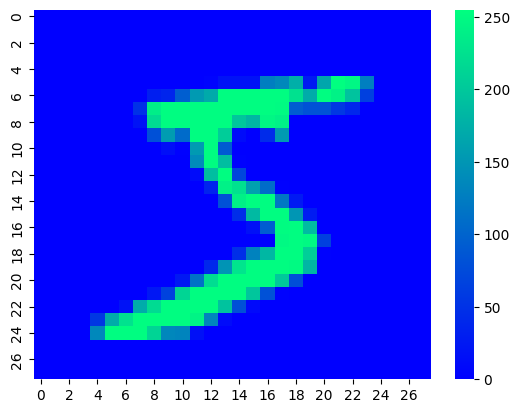

In [7]:
sns.heatmap(X_train[0] , cmap = 'winter')
plt.show()

In [9]:
y_train[0]

np.uint8(5)

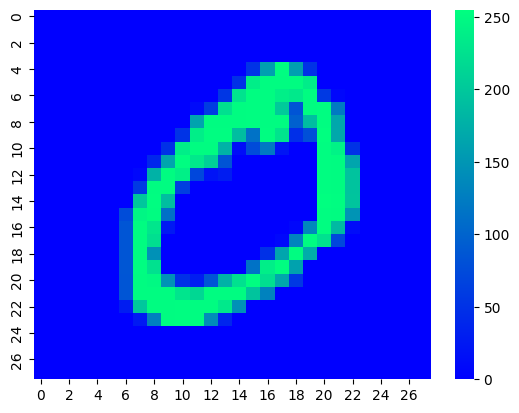

In [8]:
sns.heatmap(X_train[1] , cmap = 'winter')
plt.show()

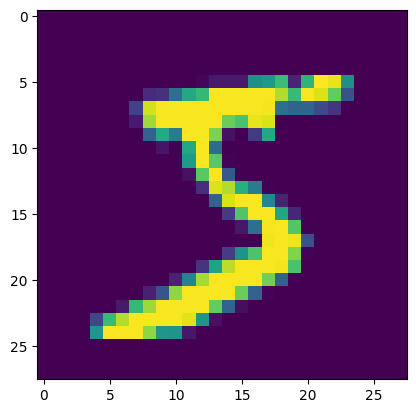

In [10]:
plt.imshow(X_train[0])
plt.show()

In [11]:
# do the scaling, divide all the pixel values with 255 
X_train = X_train / 255
X_test = X_test / 255

In [12]:
# each data point is in 28x28 2D shape, so we have to add Flatten layer to the input layer to make it 1D and Feed the model 

model = Sequential()

model.add(Flatten(input_shape = (28 , 28))) # adding input layer
model.add(Dense(units = 128 , activation = 'relu')) # hidden layer-01 with 128 nodes. 
model.add(Dense(units = 10 , activation = 'softmax')) # output layer. As it's a multi-class classification problem so we used softmax. 

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'Adam')

In [16]:
model.fit(X_train , y_train , epochs = 10 , validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2892 - val_loss: 0.1582
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1288 - val_loss: 0.1154
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0875 - val_loss: 0.1002
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0647 - val_loss: 0.0971
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0499 - val_loss: 0.0856
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0388 - val_loss: 0.0912
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0304 - val_loss: 0.0856
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0241 - val_loss: 0.0948
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0194 - val_loss: 0.0891
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0166 - val_loss: 0.0947


In [18]:
y_probability = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
y_pred = y_probability.argmax(axis = 1)

In [20]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9758

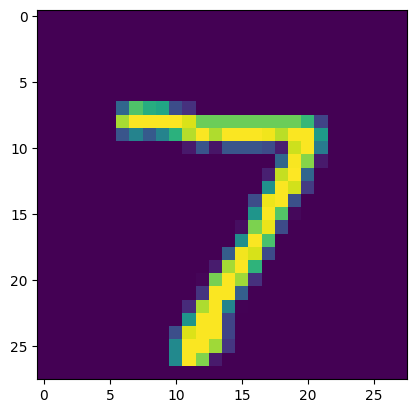

In [22]:
plt.imshow(X_test[0])
plt.show()

In [23]:
p = model.predict(X_test[0].reshape(1 , 28 , 28))
p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[3.2968535e-09, 7.3243148e-13, 1.1014538e-08, 3.7983903e-06,
        1.0622347e-14, 1.4560932e-10, 1.0553283e-14, 9.9999523e-01,
        8.4176065e-07, 1.6886185e-07]], dtype=float32)

In [24]:
p.argmax(axis = 1)

array([7])